Proportion of subjects with 'et_' prefix in training set: 0.62
Proportion of subjects with 'et_' prefix in testing set: 0.50


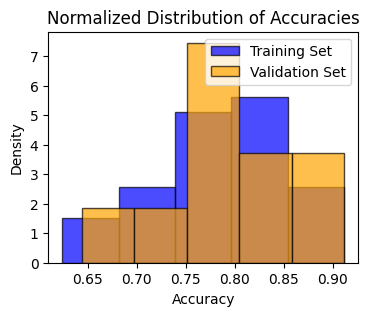

In [4]:
from os import path, listdir
import json
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

def compute_accuracy(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    total_images = len([1 for img in data])
    correct_images = sum(1 for img in data if data[img]["target_found"] == True)

    results = correct_images / total_images

    return results

def subjects_accuracy(folder_path):
    return {f: compute_accuracy(path.join(folder_path, f)) for f in listdir(folder_path) if f.endswith('.json')}

# Initialize objects
dataset_path = "HSUBANOTT"
human_scanpaths_dir = path.abspath(f"{dataset_path}/human_scanpaths")
accuracies_dict = subjects_accuracy(human_scanpaths_dir)

# Create a DataFrame with subjects and accuracies
df = pd.DataFrame(list(accuracies_dict.items()), columns=['Subject', 'Accuracy'])

# Bin accuracies into discrete categories (5 bins in this example)
df['Accuracy_Category'] = pd.qcut(df['Accuracy'], q=[0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.9, 1], labels=False)

# Extract subjects and their corresponding accuracy categories
subjects = df['Subject'].tolist()
accuracies = df['Accuracy'].tolist()
accuracy_categories = df['Accuracy_Category'].tolist()

# Split the data into training and testing sets while maintaining the same distribution of accuracy categories
train_subjects, test_subjects, train_accuracies, test_accuracies, train_categories, test_categories = train_test_split(
    subjects, accuracies, accuracy_categories, test_size=0.21, random_state=42, stratify=accuracy_categories
)

# Print the proportion of subjects with 'et_' prefix in training and testing sets
train_et_prefix_proportion = sum(subject.startswith("et_") for subject in train_subjects) / len(train_subjects)
test_et_prefix_proportion = sum(subject.startswith("et_") for subject in test_subjects) / len(test_subjects)

print(f"Proportion of subjects with 'et_' prefix in training set: {train_et_prefix_proportion:.2f}")
print(f"Proportion of subjects with 'et_' prefix in testing set: {test_et_prefix_proportion:.2f}")

# Plot the normalized distribution of accuracies in the training and testing sets on the same figure with opacity
plt.figure(figsize=(4, 3))

plt.hist(train_accuracies, bins=5, color='blue', alpha=0.7, label='Training Set', edgecolor='black', density=True)
plt.hist(test_accuracies, bins=5, color='orange', alpha=0.7, label='Validation Set', edgecolor='black', density=True)

plt.title('Normalized Distribution of Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

# I want to create a folder for the training set and another for the testing set in the root folder
# Both must have a folder within called human_scanpaths with the corresponding json files
# the images and stimuli folders must be copied from the original dataset
# the three jsons (trials_properties.json, dataset_info.json, absent_trials_propierties.json) must be copied from the original dataset folder to the new ones





In [4]:
import shutil
import os
# Create folders for training and testing sets
train_set_folder = path.join('train_set')
test_set_folder = path.join('test_set')

# Create human_scanpaths folder within each set
train_human_scanpaths_folder = path.join(train_set_folder, 'human_scanpaths')
test_human_scanpaths_folder = path.join(test_set_folder, 'human_scanpaths')

# Create necessary folders within each set
for folder in ['images', 'stimuli',"human_scanpaths"]:
    train_folder_path = path.join(train_set_folder, folder)
    test_folder_path = path.join(test_set_folder, folder)
    os.makedirs(train_folder_path, exist_ok=True)
    os.makedirs(test_folder_path, exist_ok=True)

# Copy the necessary JSON files to each set
json_files_to_copy = ['trials_properties.json', 'dataset_info.json', 'absent_trials_properties.json']

for file_name in json_files_to_copy:
    original_file_path = path.join(dataset_path, file_name)
    train_file_path = path.join(train_set_folder, file_name)
    test_file_path = path.join(test_set_folder, file_name)

    shutil.copyfile(original_file_path, train_file_path)
    shutil.copyfile(original_file_path, test_file_path)

# Copy human_scanpaths JSON files to each set
for subject in train_subjects:
    original_subject_path = path.join(dataset_path,"human_scanpaths", subject)
    train_subject_path = path.join(train_human_scanpaths_folder, subject)
    shutil.copyfile(original_subject_path, train_subject_path)

for subject in test_subjects:
    original_subject_path = path.join(dataset_path,"human_scanpaths", subject)
    test_subject_path = path.join(test_human_scanpaths_folder, subject)
    shutil.copyfile(original_subject_path, test_subject_path)